# Przewidywanie niewydolności serca

Rozpocznijmy od podstawowych importów oraz wczytania danych

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

data = pd.read_csv('heart.csv')

# Proces przetwarzania danych

Spójrzmy na to jak wyglądają przykładowe wiersze z datasetu

In [155]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Opisy kolumn z danych:
- age: wiek pacjenta [w latach]
- sex: płeć pacjenta [M: Mężyczyzna, F: Kobieta]
- ChestPainType: rodzaj bólu w klatce piersiowej [TA:- typowa dusznica bolesna, ATA: nietypowa dusznica bolesna, NAP: ból bez dusznicy bolesnej, ASY: bezobjawowa]
- RestingBP: spoczynkowe ciśnienie krwi [mm Hg]
- Cholesterol: cholesterol w surowicy [mm/dl]
- FastingBS: poziom cukru we krwi na czczo [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: wyniki elektrokardiogramu w spoczynku [Normal: Prawidłowe, ST: z nieprawidłowościami załamka ST-T (odwrócenie załamka T i/lub uniesienie lub obniżenie odcinka ST > 0,05 mV), LVH: prawdopodobny lub wyraźny przerost lewej komory według kryteriów Estesa]
- MaxHR: maksymalne osiągnięte tętno [Wartość liczbowa od 60 do 202]
- ExerciseAngina: dławica piersiowa wywołana wysiłkiem fizycznym [Y: Tak, N: Nie]
- Oldpeak: Obniżenie odcinka ST wywołane wysiłkiem fizycznym w stosunku do spoczynku [Wartość liczbowa zmierzona w depresji]
- ST_Slope: nachylenie szczytowego odcinka ST ćwiczenia [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: klasa wyjściowa [1: choroba serca, 0: normalna]

Typy danych w poszczególnych kolumnach:

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [158]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [159]:
null_counts = data.isnull().sum()
print("Ilość wartości null w każdej kolumnie:\n{}".format(null_counts))

Ilość wartości null w każdej kolumnie:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Mamy 0 brakujących wartości w naszych danych.

Możemy podzielić dane na kategoryczne oraz numeryczne

In [160]:
categorical = data.select_dtypes(include=['object'])
numerical = data.select_dtypes(include=['int64', 'float64'])
print('Categorical:\n', categorical)
print('Numerical:\n', numerical)

Categorical:
     Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0     M           ATA     Normal              N       Up
1     F           NAP     Normal              N     Flat
2     M           ATA         ST              N       Up
3     F           ASY     Normal              Y     Flat
4     M           NAP     Normal              N       Up
..   ..           ...        ...            ...      ...
913   M            TA     Normal              N     Flat
914   M           ASY     Normal              N     Flat
915   M           ASY     Normal              Y     Flat
916   F           ATA        LVH              N     Flat
917   M           NAP     Normal              N       Up

[918 rows x 5 columns]
Numerical:
      Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
0     40        140          289          0    172      0.0             0
1     49        160          180          0    156      1.0             1
2     37        130          283          0 

Teraz możemy podsumować przetwarzanie danych wykresami:

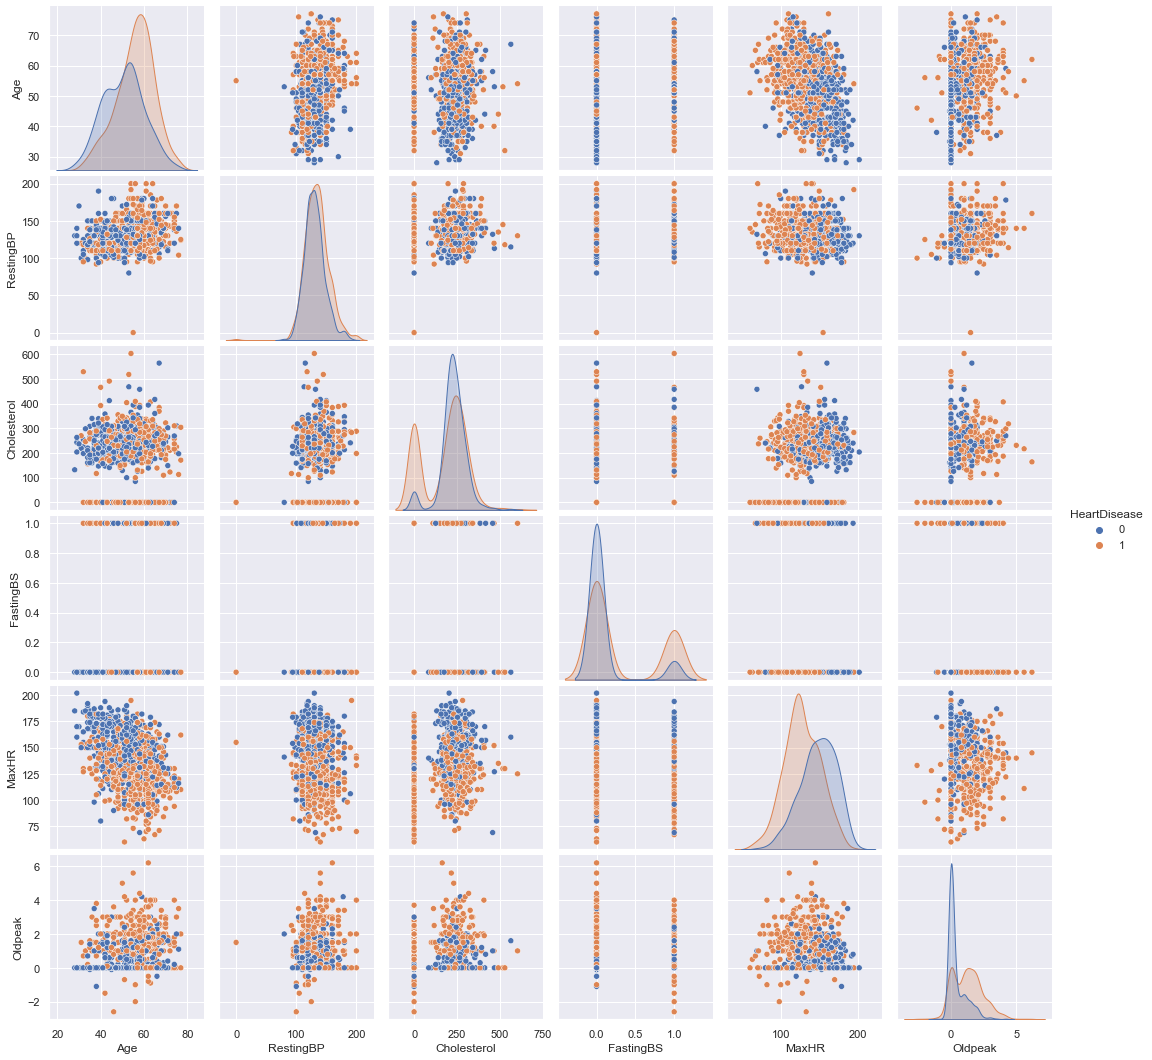

In [162]:
sns.pairplot(data, hue='HeartDisease')
plt.show()

Analiza kolumn kategorycznych

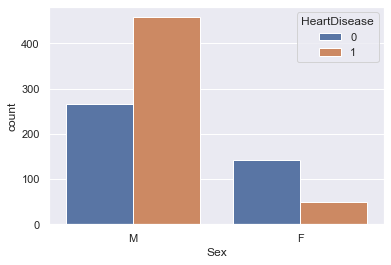

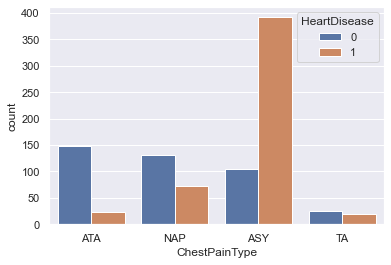

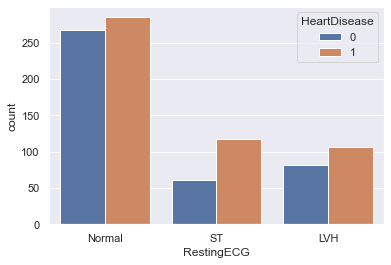

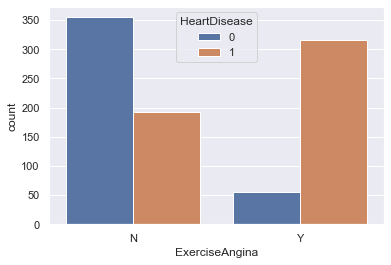

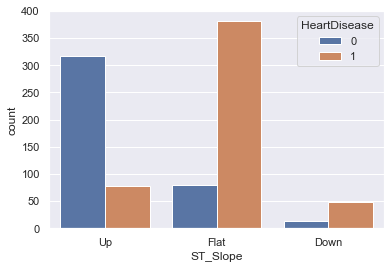

In [164]:
for variable in categorical:
    sns.countplot(x=data[variable], hue='HeartDisease', data=data)
    plt.show()

Przekształcamy kolumny z wartościami kategoryczynymi na wartości numeryczne

In [165]:
data['Sex'].replace({"M":0, "F": 1},inplace=True)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [166]:
dummy_ChestPainType = pd.get_dummies(data['ChestPainType'])
dummy_ChestPainType.rename(columns={'TA':'ChestPainType-TA','ATA':'ChestPainType-ATA','NAP':'ChestPainType-NAP','ASY':'ChestPainType-ASY'}, inplace=True)
data = pd.concat([data,dummy_ChestPainType],axis=1)
data.drop('ChestPainType',axis=1,inplace=True)
data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType-ASY,ChestPainType-ATA,ChestPainType-NAP,ChestPainType-TA
0,40,0,140,289,0,Normal,172,N,0.0,Up,0,0,1,0,0
1,49,1,160,180,0,Normal,156,N,1.0,Flat,1,0,0,1,0
2,37,0,130,283,0,ST,98,N,0.0,Up,0,0,1,0,0
3,48,1,138,214,0,Normal,108,Y,1.5,Flat,1,1,0,0,0
4,54,0,150,195,0,Normal,122,N,0.0,Up,0,0,0,1,0


In [167]:
dummy_RestingECG = pd.get_dummies(data['RestingECG'])
dummy_RestingECG.rename(columns={'Normal':'RestingECG-Normal','ST':'RestingECG-ST','LVH':'RestingECG-LVH'}, inplace=True)
data = pd.concat([data,dummy_RestingECG],axis=1)
data.drop('RestingECG',axis=1,inplace=True)
data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType-ASY,ChestPainType-ATA,ChestPainType-NAP,ChestPainType-TA,RestingECG-LVH,RestingECG-Normal,RestingECG-ST
0,40,0,140,289,0,172,N,0.0,Up,0,0,1,0,0,0,1,0
1,49,1,160,180,0,156,N,1.0,Flat,1,0,0,1,0,0,1,0
2,37,0,130,283,0,98,N,0.0,Up,0,0,1,0,0,0,0,1
3,48,1,138,214,0,108,Y,1.5,Flat,1,1,0,0,0,0,1,0
4,54,0,150,195,0,122,N,0.0,Up,0,0,0,1,0,0,1,0


In [168]:
data['ExerciseAngina'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType-ASY,ChestPainType-ATA,ChestPainType-NAP,ChestPainType-TA,RestingECG-LVH,RestingECG-Normal,RestingECG-ST
0,40,0,140,289,0,172,0,0.0,Up,0,0,1,0,0,0,1,0
1,49,1,160,180,0,156,0,1.0,Flat,1,0,0,1,0,0,1,0
2,37,0,130,283,0,98,0,0.0,Up,0,0,1,0,0,0,0,1
3,48,1,138,214,0,108,1,1.5,Flat,1,1,0,0,0,0,1,0
4,54,0,150,195,0,122,0,0.0,Up,0,0,0,1,0,0,1,0


In [169]:
dummy_ST_Slope = pd.get_dummies(data['ST_Slope'])
dummy_ST_Slope.rename(columns={'Up':'ST_Slope-Up','Flat':'ST_Slope-Flat','Down':'ST_Slope-Down'}, inplace=True)
data = pd.concat([data,dummy_ST_Slope],axis=1)
data.drop('ST_Slope',axis=1,inplace=True)
data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType-ASY,ChestPainType-ATA,ChestPainType-NAP,ChestPainType-TA,RestingECG-LVH,RestingECG-Normal,RestingECG-ST,ST_Slope-Down,ST_Slope-Flat,ST_Slope-Up
0,40,0,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,1,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,0,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,1,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,0,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


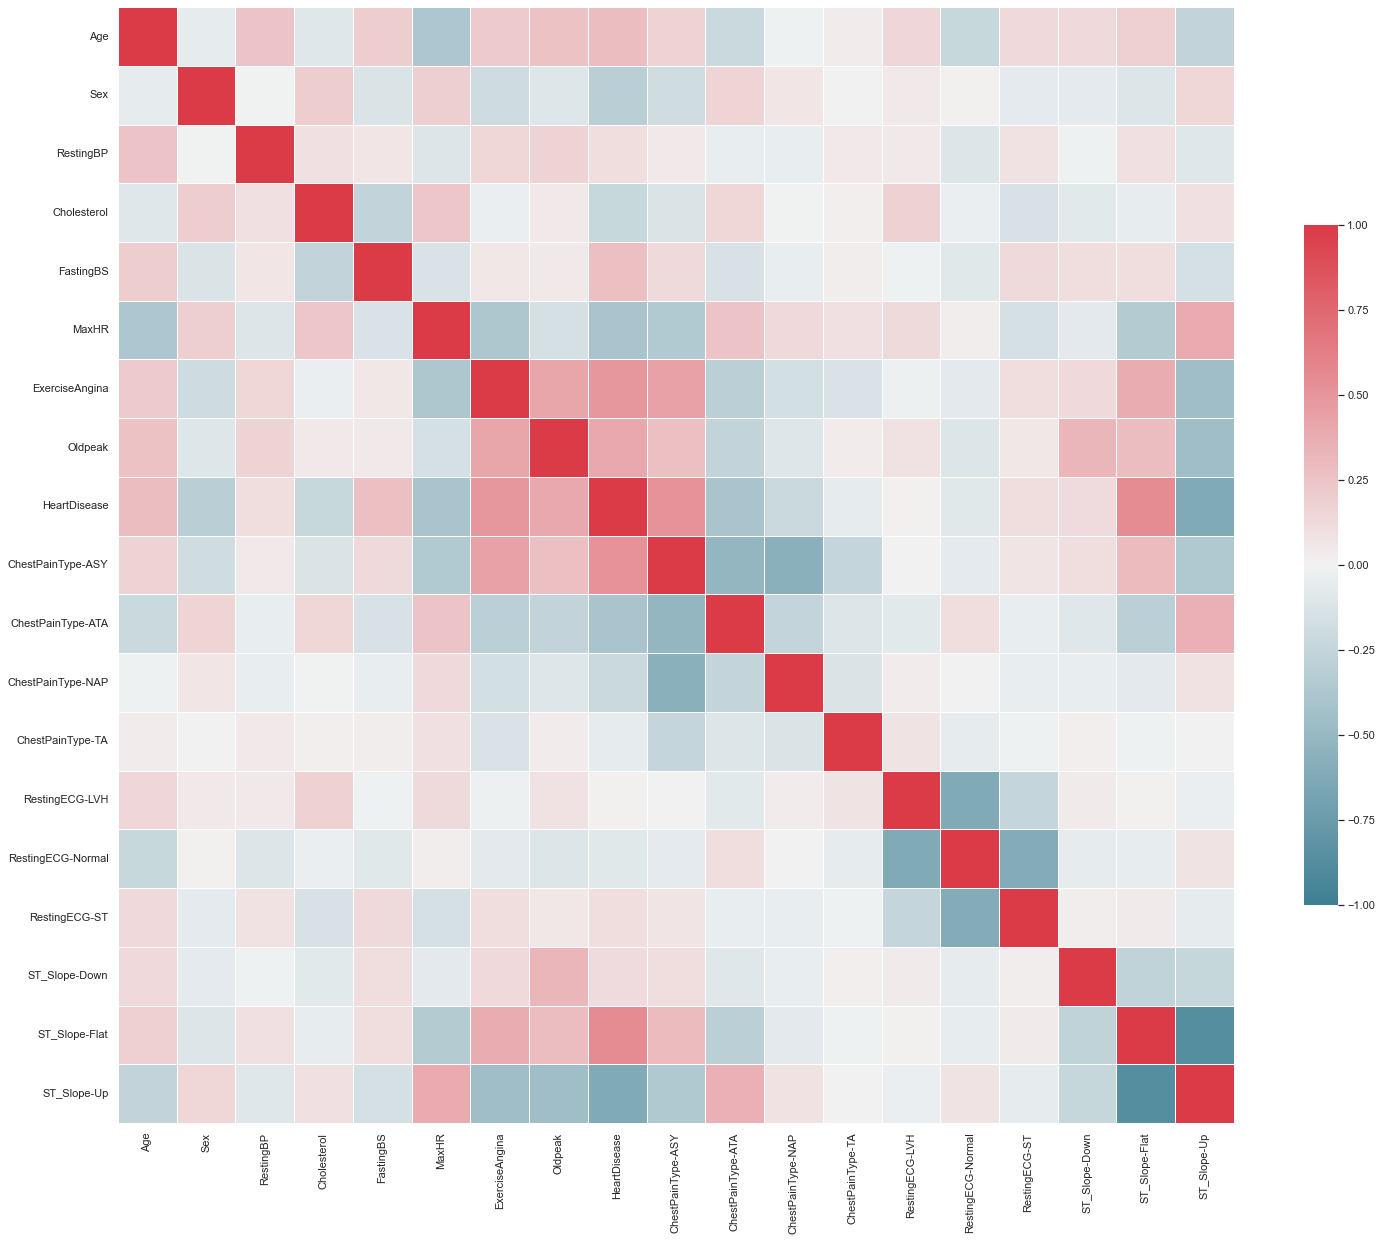

In [170]:
import seaborn as sns

sns.set(style='darkgrid')
corr = data.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(25, 25))

sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

plt.show()

Możemy zaobserwować korelację pomiędzy:
* `HeartDisease` oraz `ExerciseAngina`
* `HeartDisease` oraz `ChestPainType-ASY`
* `HeartDisease` oraz `ST_Slope_Flat`
* `HeartDisease` oraz `OldPeak`

# Modelowanie danych

Podzielmy dane na train i test

In [116]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != "HeartDisease"]
y = data["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(734, 18) (734,)
(184, 18) (184,)


In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

kfold = model_selection.KFold(n_splits=5, random_state=None)

Przy pomocy GridSearchCV wybierzmy najlepsze parametry oraz wykonajmy uczenie na modelach.

Logistic Regression

In [118]:
pipeline_1 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression(n_jobs=-1))])

param_grid_1 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipeline_1, param_grid_1, cv=kfold, return_train_score=True) 
grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 1, 'preprocessing': None}

SVM z jądrem "linear"

In [119]:
pipeline_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="linear"))])

param_grid_2 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}
grid_2 = GridSearchCV(pipeline_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 0.1, 'preprocessing': StandardScaler()}

SVM z jądrem "poly"

In [120]:
pipeline_3 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="poly"))]) 

param_grid_3 = {'preprocessing': [StandardScaler(), None],
              'classifier__C': [0.01, 0.1, 1, 10],
              'classifier__coef0': [0.01, 0.1, 1, 10],
             'classifier__degree': [1, 2, 3, 4, 5]}
grid_3 = GridSearchCV(pipeline_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__C': 1,
 'classifier__coef0': 0.01,
 'classifier__degree': 1,
 'preprocessing': StandardScaler()}

Linear SVC

In [121]:
pipeline_4 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LinearSVC(C=1))])

param_grid_4 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_4 = GridSearchCV(pipeline_4, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__C': 0.1, 'preprocessing': StandardScaler()}

SVM z jądrem rbf

In [122]:
pipeline_5 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="rbf"))])

param_grid_5 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma': [0.00001, 0.0001,0.001, 0.01, 0.1, 1, 10],
            'classifier__C': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
}

grid_5 = GridSearchCV(pipeline_5, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__C': 10000,
 'classifier__gamma': 0.0001,
 'preprocessing': StandardScaler()}

DecisionTreeClassifier

In [123]:
pipeline_6 = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeClassifier())])

param_grid_6 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [1, 5, 10],
            'classifier__max_leaf_nodes': [None, 5, 10, 20, 50],
}

grid_6 = GridSearchCV(pipeline_6, param_grid_6, cv=kfold, return_train_score=True)

grid_6.fit(X_train, y_train)
grid_6.best_params_

{'classifier__max_depth': 5,
 'classifier__max_leaf_nodes': 10,
 'preprocessing': StandardScaler()}

Bagging Classifier

In [124]:
pipeline_7 = Pipeline([('preprocessing', StandardScaler()), ('classifier', BaggingClassifier())])

param_grid_7 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_samples' : [0.1, 0.2, 0.5, 1]
}

grid_7 = GridSearchCV(pipeline_7, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
grid_7.best_params_

{'classifier__max_samples': 0.5, 'preprocessing': None}

Random Forest Classifier

In [125]:
pipeline_8 = Pipeline([('preprocessing', StandardScaler()), ('classifier', RandomForestClassifier(n_jobs=-1))])

param_grid_8 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [1, 3, 5, 10, 15, 20],
            'classifier__max_leaf_nodes' : [2, 4, 8, 16, 32],
}

grid_8 = GridSearchCV(pipeline_8, param_grid_8, cv=kfold, return_train_score=True)

grid_8.fit(X_train, y_train)
grid_8.best_params_

{'classifier__max_leaf_nodes': 32,
 'classifier__n_estimators': 10,
 'preprocessing': None}

AdaBoostClassifier

In [126]:
pipeline_9 = Pipeline([('preprocessing', StandardScaler()), ('classifier', AdaBoostClassifier())])

param_grid_9 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [1, 2, 4, 8, 16],
            'classifier__learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.5, 1],
}

grid_9 = GridSearchCV(pipeline_9, param_grid_9, cv=kfold, return_train_score=True)

grid_9.fit(X_train, y_train)
grid_9.best_params_

{'classifier__learning_rate': 0.5,
 'classifier__n_estimators': 16,
 'preprocessing': StandardScaler()}

Extra Trees Classifier

In [127]:
pipeline_10 = Pipeline([('preprocessing', StandardScaler()), ('classifier', ExtraTreesClassifier(n_jobs=-1))])

param_grid_10 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50, 100, 150],
            'classifier__max_leaf_nodes' : [2, 4, 8, 16, 32, 64, 128],
}

grid_10 = GridSearchCV(pipeline_10, param_grid_10, cv=kfold, return_train_score=True)

grid_10.fit(X_train, y_train)
grid_10.best_params_

{'classifier__max_leaf_nodes': 64,
 'classifier__n_estimators': 50,
 'preprocessing': None}

GradientBoostingClassifier

In [128]:
pipeline_11 = Pipeline([('preprocessing', StandardScaler()), ('classifier', GradientBoostingClassifier())])

param_grid_11 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50, 100],
            'classifier__learning_rate' : [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1],
}

grid_11 = GridSearchCV(pipeline_11, param_grid_11, cv=kfold, return_train_score=True)

grid_11.fit(X_train, y_train)
grid_11.best_params_

{'classifier__learning_rate': 0.1,
 'classifier__n_estimators': 50,
 'preprocessing': StandardScaler()}

KNeighborsClassifier

In [129]:
pipeline_12 = Pipeline([('preprocessing', StandardScaler()), ('classifier', KNeighborsClassifier())])

param_grid_12 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_neighbors': [1, 2, 4],
            'classifier__p': [1, 2, 4],
}

grid_12 = GridSearchCV(pipeline_12, param_grid_12, cv=kfold, return_train_score=True)

grid_12.fit(X_train, y_train)
grid_12.best_params_

{'classifier__n_neighbors': 1,
 'classifier__p': 1,
 'preprocessing': StandardScaler()}

MLP Classifier

In [130]:
pipeline_13 = Pipeline([('preprocessing', StandardScaler()), ('classifier', MLPClassifier())])

param_grid_13 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__hidden_layer_sizes': [(20,10)],
            'classifier__learning_rate_init': [0.001, 0.01, 0.1],
            'classifier__max_iter': [100, 500, 1000],
            'classifier__batch_size': [8, 16,32, 64],
}

grid_13 = GridSearchCV(pipeline_13, param_grid_13, cv=kfold, return_train_score=True)

grid_13.fit(X_train, y_train)
grid_13.best_params_

{'classifier__batch_size': 32,
 'classifier__hidden_layer_sizes': (20, 10),
 'classifier__learning_rate_init': 0.001,
 'classifier__max_iter': 500,
 'preprocessing': None}

Zbudujmy model Keras

In [143]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(200,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train,  validation_data= (X_test, y_test), batch_size=32, epochs=350)

Epoch 1/350
23/23 [==============================] - 1s 12ms/step - loss: 0.6803 - accuracy: 0.5654 - val_loss: 0.6354 - val_accuracy: 0.5815
Epoch 2/350
23/23 [==============================] - 0s 5ms/step - loss: 0.6314 - accuracy: 0.6471 - val_loss: 0.5951 - val_accuracy: 0.6739
Epoch 3/350
23/23 [==============================] - 0s 5ms/step - loss: 0.5906 - accuracy: 0.7030 - val_loss: 0.5583 - val_accuracy: 0.7174
Epoch 4/350
23/23 [==============================] - 0s 5ms/step - loss: 0.5583 - accuracy: 0.7289 - val_loss: 0.5427 - val_accuracy: 0.7174
Epoch 5/350
23/23 [==============================] - 0s 6ms/step - loss: 0.5498 - accuracy: 0.7207 - val_loss: 0.5526 - val_accuracy: 0.7065
Epoch 6/350
23/23 [==============================] - 0s 4ms/step - loss: 0.5364 - accuracy: 0.7466 - val_loss: 0.5747 - val_accuracy: 0.6630
Epoch 7/350
23/23 [==============================] - 0s 4ms/step - loss: 0.5473 - accuracy: 0.7384 - val_loss: 0.5249 - val_accuracy: 0.7446
Epoch 8/350


# Porównanie modeli

In [144]:
from sklearn import metrics

models = []
models.append(('Logistic regression', grid_1.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))
models.append(('SVM poly', grid_3.best_estimator_))
models.append(('LinearSVC', grid_4.best_estimator_))
models.append(('SVM rbf', grid_5.best_estimator_))
models.append(('DecisionTreeClassifier', grid_6.best_estimator_))
models.append(('BaggingClassifier', grid_7.best_estimator_))
models.append(('RandomForestClassifier', grid_8.best_estimator_))
models.append(('AdaBoostClassifier', grid_9.best_estimator_))
models.append(('ExtraTreesClassifier', grid_10.best_estimator_))
models.append(('GradientBoostingClassifier', grid_11.best_estimator_))
models.append(('KNeighborsClassifier', grid_12.best_estimator_))
models.append(('MLPClassifier', grid_13.best_estimator_))
models.append(('Keras', model))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    pred = model.predict(X_test)
    if name == 'Keras':
        pred = [round(x[0]) for x in model.predict(X_test)]
    precision_score.append(metrics.precision_score(y_test , pred))
    recall_score.append(metrics.recall_score(y_test , pred))
    f1_score.append( metrics.f1_score(y_test , pred))
    accuracy_score.append(metrics.accuracy_score(y_test , pred))
    roc_auc_score.append(metrics.roc_auc_score(y_test, pred))


6/6 [==============================] - 0s 2ms/step


In [145]:
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score': roc_auc_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['Logistic regression','SVM linear', 'SVM poly', 'LinearSVC', 'SVM rbf', 'DecisionTreeClassifier', 'BaggingClassifier',
                                        'RandomForestClassifier','AdaBoostClassifier', 'ExtraTreesClassifier','GradientBoostingClassifier','KNeighborsClassifier', "MLPClassifier", "Keras" ])
df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,Logistic regression,0.827586,0.897196,0.860987,0.831522,0.818728
1,SVM linear,0.834783,0.897196,0.864865,0.836957,0.825222
2,SVM poly,0.833333,0.887850,0.859729,0.831522,0.820549
3,LinearSVC,0.827586,0.897196,0.860987,0.831522,0.818728
4,SVM rbf,0.834783,0.897196,0.864865,0.836957,0.825222
5,DecisionTreeClassifier,0.840708,0.887850,0.863636,0.836957,0.827042
6,BaggingClassifier,0.862385,0.878505,0.870370,0.847826,0.841850
7,RandomForestClassifier,0.839286,0.878505,0.858447,0.831522,0.822369
8,AdaBoostClassifier,0.826087,0.887850,0.855856,0.826087,0.814055
9,ExtraTreesClassifier,0.843478,0.906542,0.873874,0.847826,0.836388


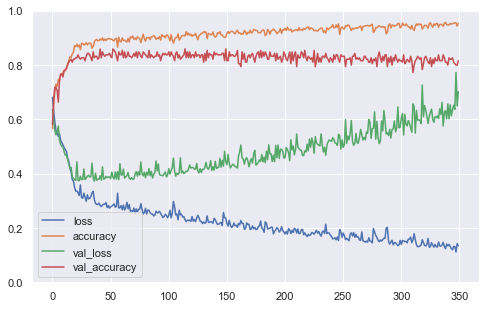

In [151]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

6/6 [==============================] - 0s 2ms/step


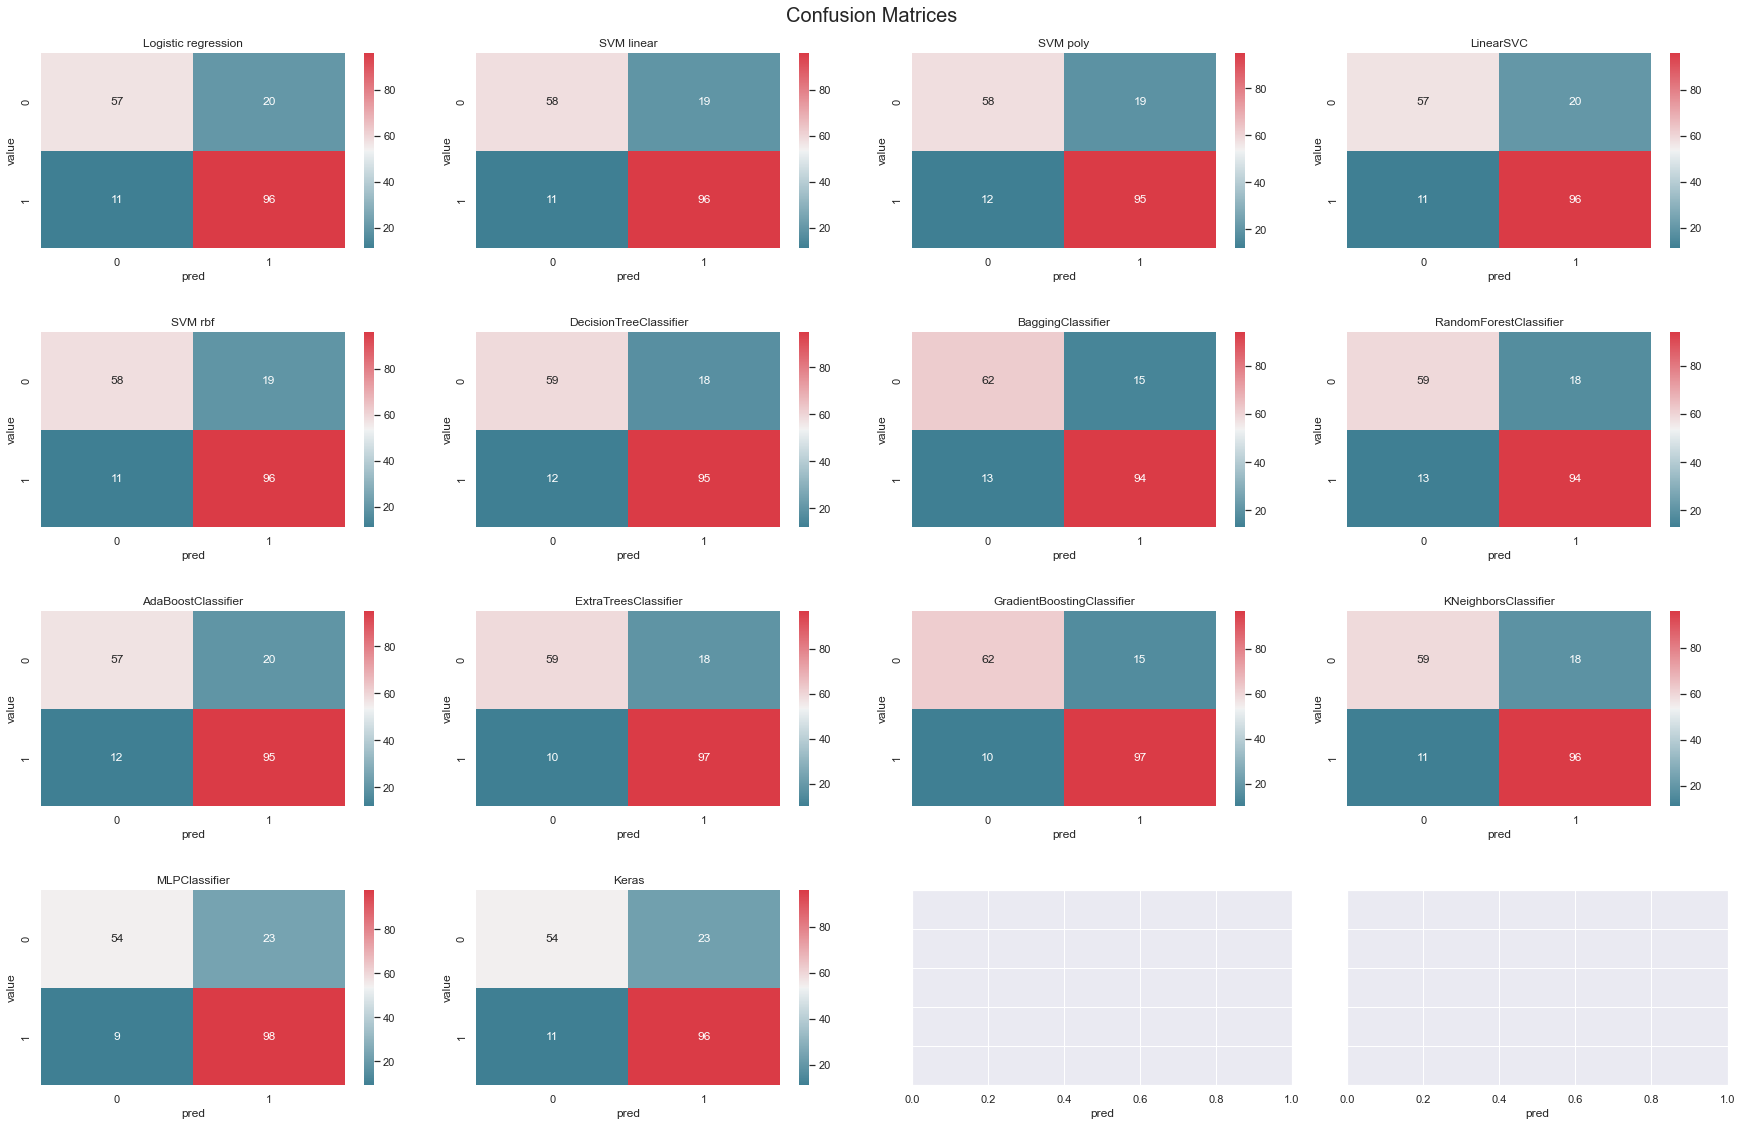

In [150]:
from sklearn.metrics import confusion_matrix

fig, axs = plt.subplots(4, 4, figsize=(25,16))

i = 0

for name, model in models:
  pred = model.predict(X_test)
  if name == 'Keras':
      pred = [round(x[0]) for x in model.predict(X_test)]

  cm = confusion_matrix(y_test, pred)
  sns.heatmap(cm, annot=True, cmap=cmap, fmt='.0f', ax=axs[i // 4, i % 4])
  axs[i // 4, i % 4].set_title(name)
  i += 1

for ax in axs.flat:
    ax.set(xlabel='pred', ylabel='value')
    ax.label_outer()

fig.tight_layout(pad=3.0)
fig.suptitle('Confusion Matrices', fontsize=20, verticalalignment='bottom')
fig.show()

# Podsumowanie
Na podstawie wyników z wykorzystanych modeli możemy stwierdzić, że są one w stanie dokonać poprawnego stwierdzenia choroby serca z wysoką precyzją.
